# Analyzing Police Activity with pandas

Preparing the data for analysis

Stanford Open Policing Project dataset

In [17]:
import pandas as pd
import numpy as np
ri=pd.read_csv('police.csv')
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [18]:
ri.isnull()
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [19]:
ri.shape
ri.drop('county_name',axis='columns',inplace=True)
ri.dropna(subset=['stop_date','stop_time'],inplace=True)

Exploring the relationship between gender and policing
Do the genders commit different violations?

In [20]:
ri.stop_outcome.value_counts()
ri.stop_outcome.value_counts().sum()
ri.stop_outcome.value_counts(normalize=True)
white = ri[ri.driver_race == 'White']
white.stop_outcome.value_counts(normalize=True)

Citation            0.902234
Warning             0.057522
Arrest Driver       0.024017
No Action           0.007047
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

Does gender affect who gets a ticket for speeding?

In [21]:
female = ri[ri.driver_gender == 'F']
female_and_arrested = ri[(ri.driver_gender == 'F') & (ri.is_arrested == True)]
female_or_arrested = ri[(ri.driver_gender == 'F') | (ri.is_arrested == True)]

Does gender affect whose vehicle is searched?

In [22]:
ri.isnull().sum()
np.mean([False,True,False,False])
ri.is_arrested.value_counts(normalize=True)
ri.is_arrested.mean()
ri.is_arrested.dtype
ri.district.unique()
ri[ri.district == 'Zone K1'].is_arrested.mean()
ri.groupby(['district','driver_gender']).is_arrested.mean()


district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

Does gender affect who is frisked during a search?

In [24]:
ri.search_type.value_counts(dropna=False)
ri['inventory'] = ri.search_type.str.contains('Inventory' , na=False)
ri.inventory.sum()
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

Visual exploratory data analysis

What violations are caught in each district?

<AxesSubplot:xlabel='driver_race'>

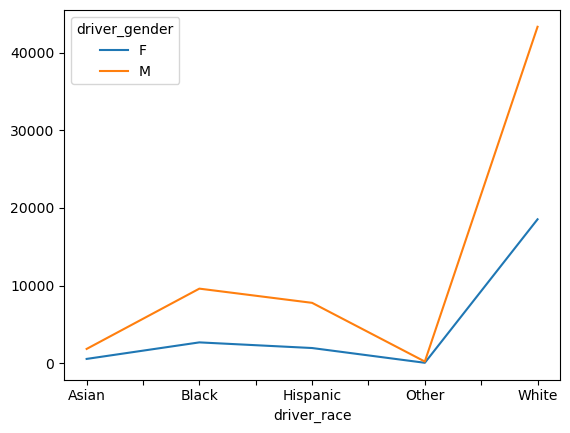

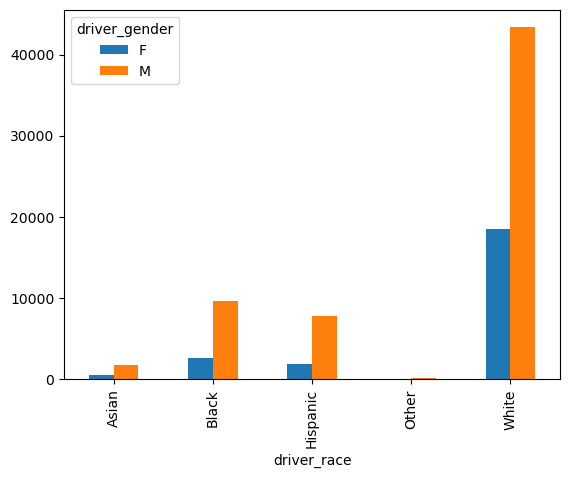

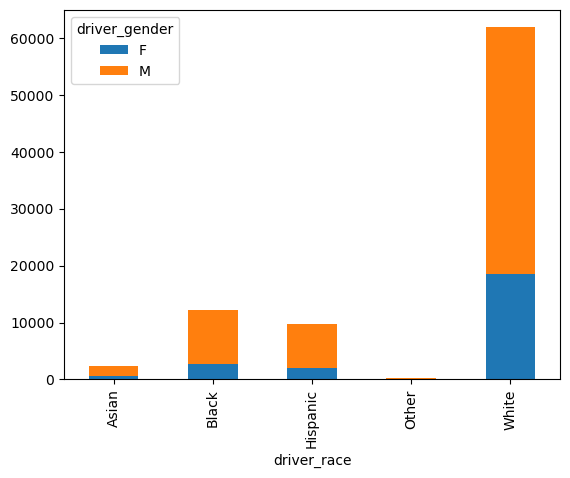

In [27]:
table=pd.crosstab(ri.driver_race,ri.driver_gender)
table.loc['Asian':'Hispanic']
table.plot()
table.plot(kind='bar')
table.plot(kind='bar',stacked=True)

Analyzing the effect of weather on policing


Exploring the weather dataset

<AxesSubplot:>

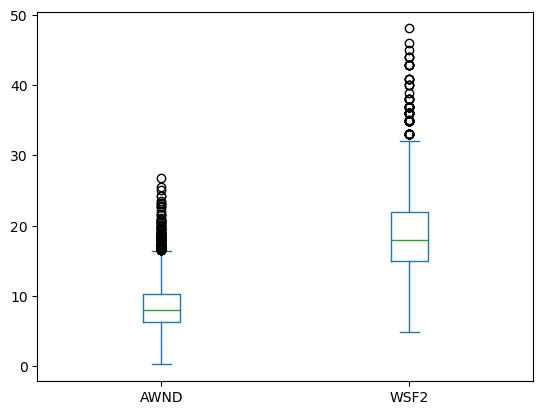

In [30]:
weather=pd.read_csv('weather.csv')
weather[['AWND','WSF2']].head()
weather[['AWND','WSF2']].describe()
weather[['AWND','WSF2']].plot(kind='box')

Categorizing the weather

In [34]:
temp=weather.loc[:,'TAVG':'TMAX']
temp.sum()
temp.sum(axis='columns').head()
mapping={'up':True,'down':False}
ri['stop_length']=ri.stop_duration.map(mapping)
ri.stop_length.memory_usage(deep=True)
cats=pd.CategoricalDtype(['short','medium','long'],ordered=True)
ri['stop_length']=ri.stop_length.astype(cats)
ri[ri.stop_length >'short'].shape

(0, 16)

Does weather affect the arrest rate?

In [37]:
ri.search_conducted.mean()
ri.groupby('driver_gender').search_conducted.mean()
search_rate=ri.groupby(['violation','driver_gender']).search_conducted.mean()
search_rate.loc['Equipment']
search_rate.loc['Equipment','M']
search_rate.unstack()
ri.pivot_table(index='violation',columns='driver_gender',values='search_conducted')

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885
